In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [18]:
X_train = pd.read_csv('data_prokopack.csv', index_col=None)
X_train["Month-Year"] = pd.to_datetime(X_train["Month-Year"])

In [19]:
X_train.head()

,Month-Year,Rainfall (mm),Site,Place,Region,Collection,Aedes aegypti
0,2014-01-06,98.6,1,1,1,1,0
1,2014-01-07,35.8,1,1,1,1,1
2,2014-01-08,89.9,1,1,1,1,0
3,2014-01-09,155.7,1,1,1,1,0
4,2014-01-10,207.6,1,1,1,1,3


In [20]:
X_train_merge = X_train.groupby("Month-Year").agg({'Rainfall (mm)':['mean'], 'Aedes aegypti':['sum']}).sort_values('Month-Year')

In [21]:
X_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2014-01-06 to 2016-01-06
Data columns (total 2 columns):
(Rainfall (mm), mean)    25 non-null float64
(Aedes aegypti, sum)     25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 600.0 bytes


In [29]:
X_train_merge.columns = [['rainfall','cases']]

In [38]:
X_train_merge.head()

,rainfall,cases
Month-Year,,
2014-01-06,126.900,13
2014-01-07,85.475,11
2014-01-08,82.925,18
2014-01-09,87.400,6
2014-01-10,129.300,20


In [75]:
X_train_num = X_train_merge.reset_index()

In [78]:
X_train_num.to_csv('merge.csv', index=False)

In [79]:
X_mrg = pd.read_csv('merge.csv', index_col=None)

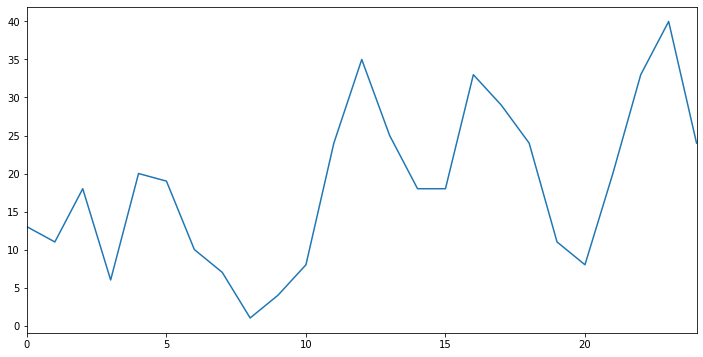

In [83]:
X_mrg['cases'].plot(figsize=(12,6))

Kurtosis of normal distribution: -0.8052539164785868
Skewness of normal distribution: 0.28522976274006623


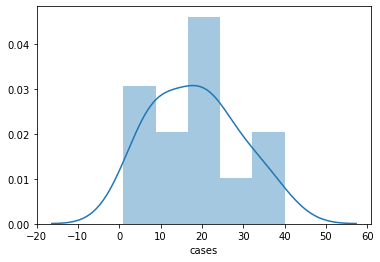

In [81]:
sns.distplot(X_mrg.cases);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(X_mrg.cases)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(X_mrg.cases)))

,count,mean,std,min,25%,50%,75%,max
cases,25.0,18.36,10.495555,1.0,10.0,18.0,24.0,40.0


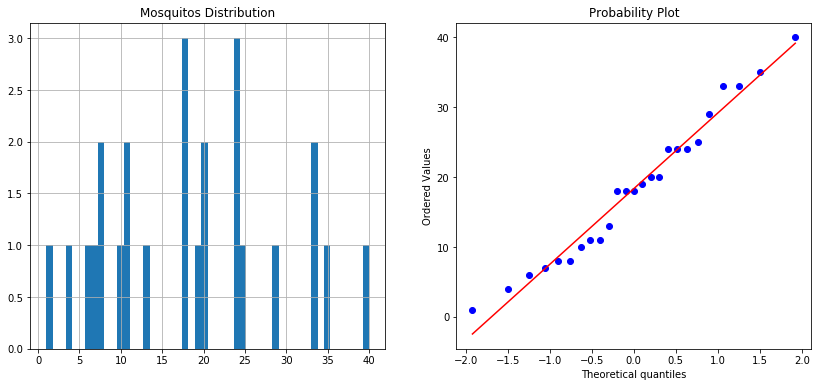

In [82]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
X_mrg['cases'].hist(bins=50)
plt.title('Mosquitos Distribution')
plt.subplot(1,2,2)
stats.probplot(X_mrg['cases'], plot=plt);
df1=X_mrg.loc[:,['Month-Year','cases']]
df1.describe().T

In [86]:
test = sm.tsa.adfuller(X_mrg['cases'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -2.6038664270087604
p-value:  0.09220078582505936
Critical values:  {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
есть единичные корни, ряд не стационарен


In [87]:
otg1diff = X_mrg['cases'].diff(periods=1).dropna()

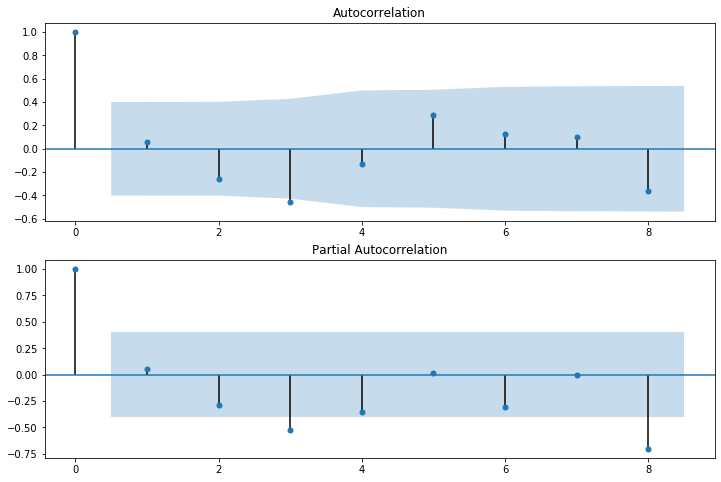

In [92]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(otg1diff.values.squeeze(), lags=8, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=8, ax=ax2)